In [1]:
# 필요한 패키지 설치

from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import scipy.stats
import scipy.stats as stats
from scipy.stats import ttest_ind
import pandas as pd

In [2]:
# 데이터 불러오기
# https://www.kaggle.com/datasets/sewonghwang/golf-ball-testing
df = pd.read_csv("datasets/Golf_test.csv")

# 데이터 샘플 확인
df.head()

,TypeA_before,TypeA_after,TypeB_before,TypeB_after,TypeC_before,TypeC_after
0,277,264,265,268,267,268
1,269,261,264,267,264,269
2,263,267,269,272,283,283
3,266,272,274,277,287,266
4,262,258,261,264,275,266


In [3]:
# stats 패키지 아노바 검정

F_statistic, pVal = stats.f_oneway(df['TypeA_before'], 
                                   df['TypeB_before'], 
                                   df['TypeC_before'])

print('일원분산분석 결과 : F={0:.1f}, p={1:.5f}'.format(F_statistic, pVal))

일원분산분석 결과 : F=4.2, p=0.01652


In [4]:
# 데이터 재구조화

df2 =  pd.melt(df)
df2 = df2[df2['variable'].isin(['TypeA_before', 'TypeB_before', 'TypeC_before'])]

df2.head()

,variable,value
0,TypeA_before,277
1,TypeA_before,269
2,TypeA_before,263
3,TypeA_before,266
4,TypeA_before,262


In [5]:
# ols 패키지 아노바 검정

model = ols('value ~ C(variable)', df2).fit()
print(anova_lm(model))

                df        sum_sq     mean_sq         F    PR(>F)
C(variable)    2.0    675.453333  337.726667  4.220169  0.016515
Residual     147.0  11763.940000   80.026803       NaN       NaN


      Multiple Comparison of Means - Tukey HSD, FWER=0.05      
   group1       group2    meandiff p-adj   lower  upper  reject
---------------------------------------------------------------
TypeA_before TypeB_before     5.14 0.0129  0.9035 9.3765   True
TypeA_before TypeC_before      1.9 0.5374 -2.3365 6.1365  False
TypeB_before TypeC_before    -3.24 0.1698 -7.4765 0.9965  False
---------------------------------------------------------------


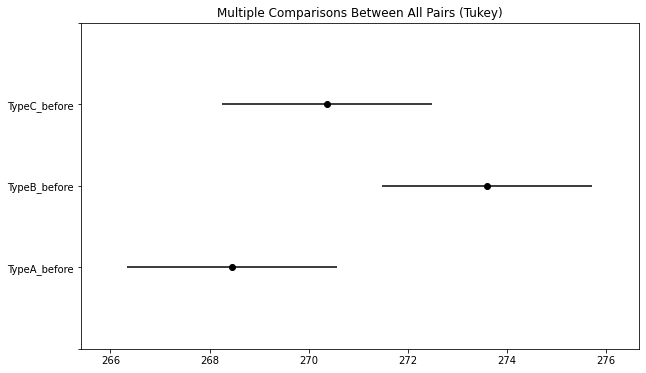

In [7]:
# 사후검정

posthoc = pairwise_tukeyhsd(df2['value'], 
                            df2['variable'], 
                            alpha=0.05)
print(posthoc)
fig = posthoc.plot_simultaneous()